In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [154]:
dc=pd.read_excel('doctor_train.xlsx')

In [155]:
dct=pd.read_excel('doctor_test.xlsx')

In [156]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [157]:
dc.shape

(5961, 7)

In [158]:
dct.shape

(1987, 6)

In [159]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [160]:
dc.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


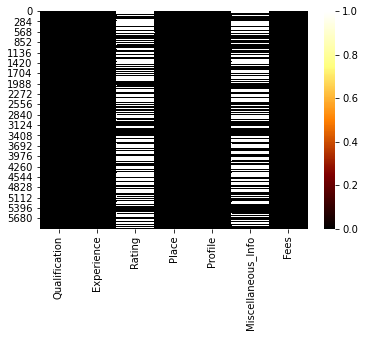

In [161]:
sns.heatmap(dc.isnull(),cmap='afmhot')

In [162]:
# Checking of column types of doctor_train dataset.
ctype=dc.dtypes.reset_index()
ctype.columns=['Count','Column Type']
ctype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,object,6


Inside doctor_train dataset we have 
1 column of int64 & 6 columns of object.

In [163]:
# Checking of column types of doctor_test dataset
ctype=dct.dtypes.reset_index()
ctype.columns=['Count','Column Type']
ctype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,object,6


In [164]:
d=dc.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualifications of a doctor in the train dataset is {}\n".format(d.max()))
print("And the qualifications of is --> {}\n\n".format(dc.Qualification[d.idxmax()]))
print("Minimum qualifications of a doctor in the train dataset is {}\n".format(d.min()))

print("And the qualifications of is --> {}\n\n".format(dc.Qualification[d.idxmin()]))

Maximum qualifications of a doctor in the train dataset is 10

And the qualifications of is --> Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology


Minimum qualifications of a doctor in the train dataset is 1

And the qualifications of is --> BAMS




Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


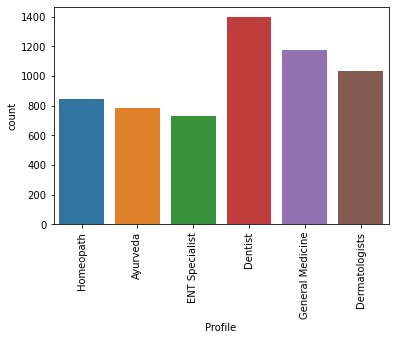

In [165]:
sns.countplot(dc['Profile'])
plt.xticks(rotation=90)
print(dc['Profile'].value_counts())

In profile highest count is for Dentist and lowest is for ENT Specialist.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

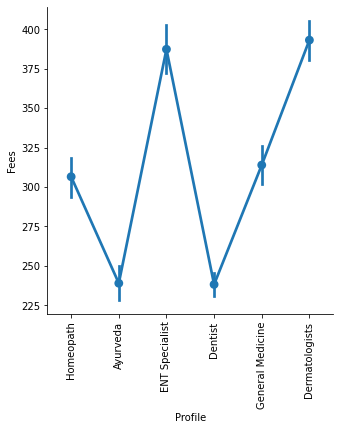

In [166]:
sns.factorplot(x='Profile',y='Fees',data=dc)
plt.xticks(rotation=90)

highest fees for Dermatologists & ENT.
Lowest fees for Ayurveda & Dentist.

In [167]:
dc.Qualification.describe

<bound method NDFrame.describe of 0                BHMS, MD - Homeopathy
1         BAMS, MD - Ayurveda Medicine
2       MBBS, MS - Otorhinolaryngology
3                  BSc - Zoology, BAMS
4                                 BAMS
                     ...              
5956                    MBBS, MS - ENT
5957                              MBBS
5958                              MBBS
5959       MBBS, MD - General Medicine
5960           BDS, MDS - Orthodontics
Name: Qualification, Length: 5961, dtype: object>

In [168]:
sorted(dc.Qualification[dc.Qualification.apply(lambda x: len(x.split(','))).idxmax()].split(","))

[' Certificate in Cosmetic Dentistry',
 ' Certification in Full Mouth Rehabilitation',
 ' Certified Advance Course In Endodontics',
 ' Certified BPS Dentist',
 ' Certified in Orthodontics',
 ' Degree in Dental Implant',
 ' Fellowship in Advanced Endoscopic Sinus Surgery',
 ' Fellowship in Lasers & Cosmetology',
 ' Professional Implantology Training Course (PITC)',
 'Fellowship in Oral implantlogy']

In [169]:
# We can observe that our qualification is not proper format such as: empty spaces, captial alphabets, brackets. Now we will sort and remove inconsistensies in the dataset.

In [170]:
dc['Years of Exp'] = dc['Experience'].str.slice(stop=2).astype(int)

In [171]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,33
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15


In [172]:
import re
def sortQual(text):
    ag = re.sub(r'\([^()]+\)', lambda x: x.group().replace(",","-"),text)
    return ','.join(sorted(ag.lower().replace(" ","").split(",")))

In [173]:
dc.Qualification = dc.Qualification.apply(lambda x: sortQual(x))

In [174]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp
0,"bhms,md-homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"bams,md-ayurvedamedicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"mbbs,ms-otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"bams,bsc-zoology",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,bams,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20
...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19
5957,mbbs,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,33
5958,mbbs,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41
5959,"mbbs,md-generalmedicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15


In [175]:
# Checking and counting total number of unique qualifications in Train set

def doc(series):
    Quals =''
    for i in series:
        Quals+= i + ','
    return Quals

In [176]:
from collections import Counter

text= doc(dc.Qualification)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()),orient='index').reset_index()
df.columns=["Qualification",'Count']
df.head(10)

,Qualification,Count
0,mbbs,2808
1,bds,1363
2,bams,764
3,bhms,749
4,md-dermatology,606
5,ms-ent,411
6,venereology&leprosy,297
7,md-generalmedicine,285
8,diplomainotorhinolaryngology(dlo),250
9,md-homeopathy,181


lets assign category codes to the unique qualifications in the train dataset.

In [177]:
text = doc(dc.Qualification)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df.columns=['Qualification','Count']
df['code'] = df.Qualification.astype('category').cat.codes
df.head(10)
                            


,Qualification,Count,code
0,mbbs,2808,502
1,bds,1363,27
2,bams,764,25
3,bhms,749,29
4,md-dermatology,606,535
5,ms-ent,411,645
6,venereology&leprosy,297,783
7,md-generalmedicine,285,540
8,diplomainotorhinolaryngology(dlo),250,216
9,md-homeopathy,181,543


In [178]:
# Creating a dictionary of  Qualification with there respective codes
qual_dict = dict(zip(df.Qualification, df.code))

In [179]:
qual_dict

{'mbbs': 502,
 'bds': 27,
 'bams': 25,
 'bhms': 29,
 'md-dermatology': 535,
 'ms-ent': 645,
 'venereology&leprosy': 783,
 'md-generalmedicine': 540,
 'diplomainotorhinolaryngology(dlo)': 216,
 'md-homeopathy': 543,
 'ddvl': 144,
 'md-ayurvedamedicine': 527,
 'ddv': 142,
 'dnb-ent': 270,
 'mds-conservativedentistry&endodontics': 581,
 'mds-oral&maxillofacialsurgery': 586,
 'ms-otorhinolaryngology': 651,
 'dnb-dermatology&venereology': 268,
 'mds': 580,
 'mds-prosthodontics': 603,
 'md-medicine': 549,
 'md-internalmedicine': 547,
 'mds-orthodontics': 593,
 'diplomaindermatology': 176,
 'dnb': 265,
 'postgraduatediplomaindiabetology(pgdd)': 744,
 'dhms(diplomainhomeopathicmedicineandsurgery)': 150,
 'mds-periodontologyandoralimplantology': 600,
 'mds-paedodonticsandpreventivedentistry': 596,
 'mds-periodontics': 598,
 'dvd': 303,
 'mds-prosthodontistandcrownbridge': 605,
 'dnb-otorhinolaryngology': 281,
 'mds-orthodonticsanddentofacialorthopaedics': 594,
 'ms-generalsurgery': 646,
 'dnb-g

In [180]:
for i in range(0,d.max()):
    dc['Qualification'+ str(i+1)]=dc['Qualification'].str.split(',').str[i]

In [181]:
dc.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,"bhms,md-homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"bams,bsc-zoology",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bams,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bams,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100,8,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,bhms,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200,42,bhms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,bds,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200,10,bds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"mbbs,md-generalmedicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100,14,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"bds,bsc",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100,23,bds,bsc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
dc['Experience'].value_counts()

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
59 years experience      1
58 years experience      1
61 years experience      1
66 years experience      1
60 years experience      1
Name: Experience, Length: 64, dtype: int64

In [183]:
#converting rating into float type
dc['Rating']=dc['Rating'].str.rstrip('%').astype('float')

In [184]:
dc['Rating'].dtypes

dtype('float64')

In [185]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,"bhms,md-homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"bams,bsc-zoology",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bams,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19,mbbs,ms-ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,mbbs,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,33,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5958,mbbs,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5959,"mbbs,md-generalmedicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
dc['Rating'].isnull().sum()

3302

In [187]:
dc.skew()

Rating         -3.277801
Fees            0.751870
Years of Exp    0.991089
dtype: float64

In [188]:
#Rating is skewed we fill the null values with median.

In [189]:
dc['Rating'].median()

97.0

In [190]:
dc['Rating']=dc['Rating'].fillna(0)

In [191]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,"bhms,md-homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9 years experience,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"bams,bsc-zoology",12 years experience,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bams,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19,mbbs,ms-ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,mbbs,33 years experience,0.0,"Nungambakkam, Chennai",General Medicine,NaN,100,33,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5958,mbbs,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5959,"mbbs,md-generalmedicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
dc['Place'].isnull().sum()

25

In [193]:
# Removing null values of Place  and as it is categorical data we will replace its null values with mode.
dc['Place'].mode()

0    HSR Layout, Bangalore
dtype: object

In [194]:
dc['Place']=dc['Place'].fillna('HSR Layout, Bangalore')

In [195]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10
0,"bhms,md-homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"bams,md-ayurvedamedicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"mbbs,ms-otorhinolaryngology",9 years experience,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"bams,bsc-zoology",12 years experience,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bams,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19,mbbs,ms-ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,mbbs,33 years experience,0.0,"Nungambakkam, Chennai",General Medicine,NaN,100,33,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5958,mbbs,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5959,"mbbs,md-generalmedicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
dc['Locality'] = dc['Place'].str.split(',').str[0]
dc['City'] =dc['Place'].str.split(',').str[1]

In [197]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City
0,"bhms,md-homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,bhms,md-homeopathy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kakkanad,Ernakulam
1,"bams,md-ayurvedamedicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,bams,md-ayurvedamedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Whitefield,Bangalore
2,"mbbs,ms-otorhinolaryngology",9 years experience,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,mbbs,ms-otorhinolaryngology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mathikere - BEL,Bangalore
3,"bams,bsc-zoology",12 years experience,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,bams,bsc-zoology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bannerghatta Road,Bangalore
4,bams,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,bams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19,mbbs,ms-ent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basavanagudi,Bangalore
5957,mbbs,33 years experience,0.0,"Nungambakkam, Chennai",General Medicine,NaN,100,33,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nungambakkam,Chennai
5958,mbbs,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41,mbbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater Kailash Part 2,Delhi
5959,"mbbs,md-generalmedicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15,mbbs,md-generalmedicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vileparle West,Mumbai


In [198]:
dc.Miscellaneous_Info[0:50]

0                  100% 16 Feedback Kakkanad, Ernakulam
1                 98% 76 Feedback Whitefield, Bangalore
2                                                   NaN
3     Bannerghatta Road, Bangalore ₹250 Available on...
4                 100% 4 Feedback Keelkattalai, Chennai
5                                                   NaN
6                                                   NaN
7     Dental Fillings Crowns and Bridges Fixing Impa...
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12    98% 14 Feedback Coimbatore Racecourse, Coimbatore
13        Dental Crowns Facet Dental Dental prophylaxis
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                              

1. few rows give only the profile related info of the doctor.
2. few rows have NaN values.
3. rest rows  give info about doctors rating and people feedback given and the address.

In [199]:
dc['Miscellaneous_Info']=dc['Miscellaneous_Info'].str.replace('₹','INR ')

In [200]:
dc.Miscellaneous_Info[dc.Miscellaneous_Info.str.contains('INR',na=False)].sample(20)

1867      4 Feedback Jayanagar 5 Block, Bangalore INR 600
567          Mayur Vihar Ph-I, Delhi INR 500 Visits Today
1541      Dwarka Sector 22, Delhi INR 300 Available Today
4616             Punjabi Bagh, Delhi INR 250 Visits Today
4537           Royapettah, Chennai INR 200 Visits On-Call
2983             IP Extension, Delhi INR 250 Visits Today
2180     South Extension 2, Delhi INR 600 Available Today
2006              1 Feedback Perumbakkam, Chennai INR 100
2104         Trimulgherry, Hyderabad INR 300 Visits Today
2225             1 Feedback Guduvanchery, Chennai INR 100
996           Andheri East, Mumbai INR 1,000 Visits Today
578             Cuffe Parade, Mumbai INR 200 Visits Today
2461     Jubilee Hills, Hyderabad INR 200 Available Today
4643    Mulund West, Mumbai INR 400 Visits on Fri, 08 Feb
2059           Guduvanchery, Chennai INR 100 Visits Today
1471    Borivali East, Mumbai INR 475INR 5005% OFF* Av...
4090             Manapakkam, Chennai INR 600 Visits Today
3110    Patpar

In [201]:
# Making a Function to extract the fees value from the Miscellaneous_Info

def fee_info(b):
    list=re.search(r'INR (\d*)',b)
    if list:
        return int(list.group(1))
    else:
        return 0

In [202]:
dc['MIF']=dc['Miscellaneous_Info'].apply(lambda x: fee_info(x) if "INR" in str(x) else 0)

In [203]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp,Qualification1,Qualification2,...,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF
0,"bhms,md-homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,bhms,md-homeopathy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kakkanad,Ernakulam,0
1,"bams,md-ayurvedamedicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,bams,md-ayurvedamedicine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Whitefield,Bangalore,0
2,"mbbs,ms-otorhinolaryngology",9 years experience,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,mbbs,ms-otorhinolaryngology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mathikere - BEL,Bangalore,0
3,"bams,bsc-zoology",12 years experience,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250,12,bams,bsc-zoology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bannerghatta Road,Bangalore,250
4,bams,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,bams,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Keelkattalai,Chennai,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19,mbbs,ms-ent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basavanagudi,Bangalore,0
5957,mbbs,33 years experience,0.0,"Nungambakkam, Chennai",General Medicine,NaN,100,33,mbbs,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nungambakkam,Chennai,0
5958,mbbs,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41,mbbs,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater Kailash Part 2,Delhi,0
5959,"mbbs,md-generalmedicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15,mbbs,md-generalmedicine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vileparle West,Mumbai,0


In [204]:
#Using Number of feedbacks and making a separate column for the Number of feedbacks recieved

def feed(num):
    fdbck=re.search(r' (.*?) Feedback',num)
    if fdbck:
        return int(fdbck.group(1))
    else:
        return 0

In [205]:
dc['Number_of_Feedback']=dc['Miscellaneous_Info'].apply(lambda x: feed(x) if "%" in str(x) else 0)

In [206]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp,Qualification1,Qualification2,...,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF,Number_of_Feedback
0,"bhms,md-homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,bhms,md-homeopathy,...,NaN,NaN,NaN,NaN,NaN,NaN,Kakkanad,Ernakulam,0,16
1,"bams,md-ayurvedamedicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,bams,md-ayurvedamedicine,...,NaN,NaN,NaN,NaN,NaN,NaN,Whitefield,Bangalore,0,76
2,"mbbs,ms-otorhinolaryngology",9 years experience,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,mbbs,ms-otorhinolaryngology,...,NaN,NaN,NaN,NaN,NaN,NaN,Mathikere - BEL,Bangalore,0,0
3,"bams,bsc-zoology",12 years experience,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250,12,bams,bsc-zoology,...,NaN,NaN,NaN,NaN,NaN,NaN,Bannerghatta Road,Bangalore,250,0
4,bams,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,bams,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Keelkattalai,Chennai,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19,mbbs,ms-ent,...,NaN,NaN,NaN,NaN,NaN,NaN,Basavanagudi,Bangalore,0,45
5957,mbbs,33 years experience,0.0,"Nungambakkam, Chennai",General Medicine,NaN,100,33,mbbs,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Nungambakkam,Chennai,0,0
5958,mbbs,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41,mbbs,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Greater Kailash Part 2,Delhi,0,11
5959,"mbbs,md-generalmedicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15,mbbs,md-generalmedicine,...,NaN,NaN,NaN,NaN,NaN,NaN,Vileparle West,Mumbai,0,0


In [207]:
#Encoding all the Qualification columns from 1 to 10 using the dictionary we created above namely :- qual_dict.
gp=['Qualification1','Qualification2','Qualification3','Qualification4','Qualification5','Qualification6','Qualification7','Qualification8','Qualification9','Qualification10']
for i in gp:
    dc.replace({i:qual_dict},inplace=True)

In [208]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp,Qualification1,Qualification2,...,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF,Number_of_Feedback
0,"bhms,md-homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,29,543.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Kakkanad,Ernakulam,0,16
1,"bams,md-ayurvedamedicine",12 years experience,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,25,527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Whitefield,Bangalore,0,76
2,"mbbs,ms-otorhinolaryngology",9 years experience,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,502,651.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Mathikere - BEL,Bangalore,0,0
3,"bams,bsc-zoology",12 years experience,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore INR 250 Available...",250,12,25,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Bannerghatta Road,Bangalore,250,0
4,bams,20 years experience,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Keelkattalai,Chennai,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98.0,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,19,502,645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Basavanagudi,Bangalore,0,45
5957,mbbs,33 years experience,0.0,"Nungambakkam, Chennai",General Medicine,NaN,100,33,502,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Nungambakkam,Chennai,0,0
5958,mbbs,41 years experience,97.0,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41,502,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Greater Kailash Part 2,Delhi,0,11
5959,"mbbs,md-generalmedicine",15 years experience,90.0,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,15,502,540.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Vileparle West,Mumbai,0,0


In [209]:
#Encoding categorical columns:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bin=['Profile','City','Locality']
for i in bin:
    dc[i]=le.fit_transform(dc[i].astype('str'))

In [210]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp,Qualification1,Qualification2,...,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF,Number_of_Feedback
0,"bhms,md-homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",5,"100% 16 Feedback Kakkanad, Ernakulam",100,24,29,543.0,...,NaN,NaN,NaN,NaN,NaN,NaN,296,4,0,16
1,"bams,md-ayurvedamedicine",12 years experience,98.0,"Whitefield, Bangalore",0,"98% 76 Feedback Whitefield, Bangalore",350,12,25,527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,855,0,0,76
2,"mbbs,ms-otorhinolaryngology",9 years experience,0.0,"Mathikere - BEL, Bangalore",3,NaN,300,9,502,651.0,...,NaN,NaN,NaN,NaN,NaN,NaN,452,0,0,0
3,"bams,bsc-zoology",12 years experience,0.0,"Bannerghatta Road, Bangalore",0,"Bannerghatta Road, Bangalore INR 250 Available...",250,12,25,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68,0,250,0
4,bams,20 years experience,100.0,"Keelkattalai, Chennai",0,"100% 4 Feedback Keelkattalai, Chennai",250,20,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,335,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98.0,"Basavanagudi, Bangalore",3,"98% 45 Feedback Basavanagudi, Bangalore",300,19,502,645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,70,0,0,45
5957,mbbs,33 years experience,0.0,"Nungambakkam, Chennai",4,NaN,100,33,502,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,535,1,0,0
5958,mbbs,41 years experience,97.0,"Greater Kailash Part 2, Delhi",4,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41,502,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,215,3,0,11
5959,"mbbs,md-generalmedicine",15 years experience,90.0,"Vileparle West, Mumbai",4,General Medical Consultation Viral Fever Treat...,100,15,502,540.0,...,NaN,NaN,NaN,NaN,NaN,NaN,840,6,0,0


In [211]:
#checking for missing values in the data
dc.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Years of Exp             0
Qualification1           0
Qualification2        1962
Qualification3        4591
Qualification4        5589
Qualification5        5845
Qualification6        5928
Qualification7        5949
Qualification8        5956
Qualification9        5957
Qualification10       5960
Locality                 0
City                     0
MIF                      0
Number_of_Feedback       0
dtype: int64

In [212]:
# We will treat the null values of Qualification columns only. miscellaneous info column will be dropped as we have extracted the info whatever was useful.

In [213]:
group=['Qualification1','Qualification2','Qualification3','Qualification4','Qualification5','Qualification6','Qualification7','Qualification8','Qualification9','Qualification10']
for i in group:
    dc[i].fillna(0,inplace=True)

In [214]:
dc

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Years of Exp,Qualification1,Qualification2,...,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF,Number_of_Feedback
0,"bhms,md-homeopathy",24 years experience,100.0,"Kakkanad, Ernakulam",5,"100% 16 Feedback Kakkanad, Ernakulam",100,24,29,543.0,...,0.0,0.0,0.0,0.0,0.0,0.0,296,4,0,16
1,"bams,md-ayurvedamedicine",12 years experience,98.0,"Whitefield, Bangalore",0,"98% 76 Feedback Whitefield, Bangalore",350,12,25,527.0,...,0.0,0.0,0.0,0.0,0.0,0.0,855,0,0,76
2,"mbbs,ms-otorhinolaryngology",9 years experience,0.0,"Mathikere - BEL, Bangalore",3,NaN,300,9,502,651.0,...,0.0,0.0,0.0,0.0,0.0,0.0,452,0,0,0
3,"bams,bsc-zoology",12 years experience,0.0,"Bannerghatta Road, Bangalore",0,"Bannerghatta Road, Bangalore INR 250 Available...",250,12,25,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,68,0,250,0
4,bams,20 years experience,100.0,"Keelkattalai, Chennai",0,"100% 4 Feedback Keelkattalai, Chennai",250,20,25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,335,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,"mbbs,ms-ent",19 years experience,98.0,"Basavanagudi, Bangalore",3,"98% 45 Feedback Basavanagudi, Bangalore",300,19,502,645.0,...,0.0,0.0,0.0,0.0,0.0,0.0,70,0,0,45
5957,mbbs,33 years experience,0.0,"Nungambakkam, Chennai",4,NaN,100,33,502,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,535,1,0,0
5958,mbbs,41 years experience,97.0,"Greater Kailash Part 2, Delhi",4,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,41,502,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,215,3,0,11
5959,"mbbs,md-generalmedicine",15 years experience,90.0,"Vileparle West, Mumbai",4,General Medical Consultation Viral Fever Treat...,100,15,502,540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,840,6,0,0


In [215]:
dc.drop(['Qualification','Experience','Place','Miscellaneous_Info'],axis=1,inplace=True)
dc

,Rating,Profile,Fees,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF,Number_of_Feedback
0,100.0,5,100,24,29,543.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,296,4,0,16
1,98.0,0,350,12,25,527.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,855,0,0,76
2,0.0,3,300,9,502,651.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452,0,0,0
3,0.0,0,250,12,25,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,0,250,0
4,100.0,0,250,20,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,98.0,3,300,19,502,645.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,0,0,45
5957,0.0,4,100,33,502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,535,1,0,0
5958,97.0,4,600,41,502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215,3,0,11
5959,90.0,4,100,15,502,540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,840,6,0,0


In [216]:
#lets check the correlation map of the dataset
dc.corr()

,Rating,Profile,Fees,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF,Number_of_Feedback
Rating,1.000000,-0.126389,0.153273,-0.038569,-0.074021,0.168351,0.145081,0.118222,0.073708,0.028818,0.007079,0.016025,0.013750,0.014991,-0.036624,-0.092861,-0.128254,0.236208
Profile,-0.126389,1.000000,0.145226,0.202073,0.356060,0.019418,0.031121,0.010343,0.012249,0.023153,0.033306,0.024192,0.021314,-0.011266,0.019533,-0.013748,0.013254,0.004340
Fees,0.153273,0.145226,1.000000,0.002117,0.196981,0.231700,0.164725,0.102092,0.066649,0.026285,0.020847,-0.008060,-0.000713,-0.000539,-0.052750,-0.024793,0.117223,0.076622
Years of Exp,-0.038569,0.202073,0.002117,1.000000,0.236055,0.051670,-0.002731,-0.005707,-0.016481,-0.008939,0.009878,0.001440,-0.006146,0.005459,0.015970,0.037863,-0.032696,0.017130
Qualification1,-0.074021,0.356060,0.196981,0.236055,1.000000,0.287321,0.146806,-0.016600,-0.021597,-0.027811,-0.024967,-0.024937,-0.021403,-0.008506,0.015721,-0.022791,0.035419,0.059398
Qualification2,0.168351,0.019418,0.231700,0.051670,0.287321,1.000000,0.205032,0.018187,-0.023288,-0.023300,-0.021824,-0.022571,-0.024162,-0.011822,0.020953,-0.057054,0.015930,0.060235
Qualification3,0.145081,0.031121,0.164725,-0.002731,0.146806,0.205032,1.000000,0.334770,0.143447,0.062933,0.024839,0.008584,0.004321,-0.001255,-0.008072,-0.046308,-0.009661,0.086371
Qualification4,0.118222,0.010343,0.102092,-0.005707,-0.016600,0.018187,0.334770,1.000000,0.432701,0.209993,0.089048,0.045111,0.036037,0.006289,-0.030865,0.006587,-0.022410,0.071829
Qualification5,0.073708,0.012249,0.066649,-0.016481,-0.021597,-0.023288,0.143447,0.432701,1.000000,0.452248,0.199496,0.110629,0.092375,0.015213,-0.026268,0.014959,0.008253,0.033299
Qualification6,0.028818,0.023153,0.026285,-0.008939,-0.027811,-0.023300,0.062933,0.209993,0.452248,1.000000,0.465108,0.264195,0.235626,0.038976,0.000939,-0.002096,0.015340,0.020248


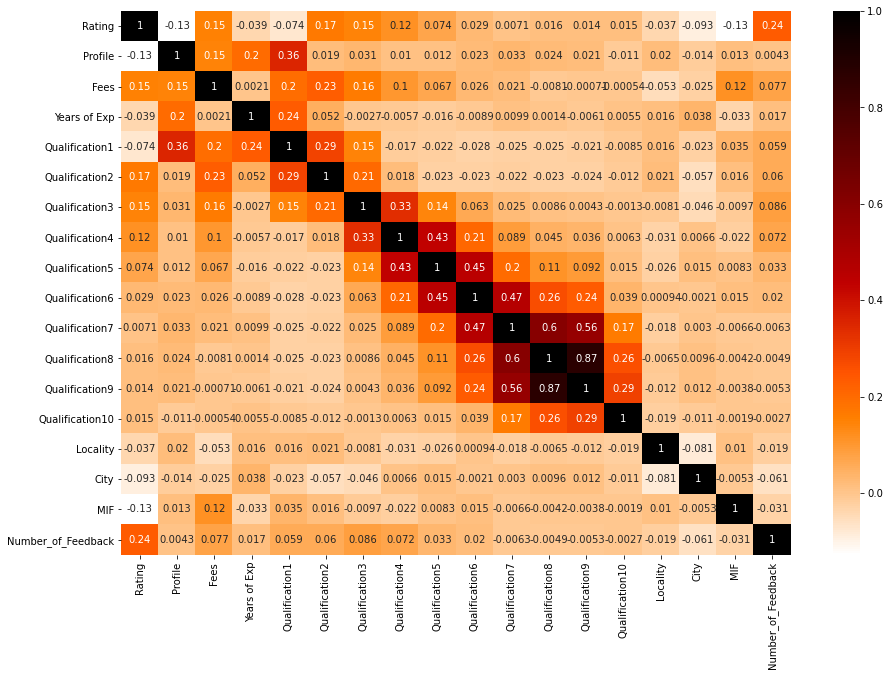

In [217]:
plt.figure(figsize=(15,10))
sns.heatmap(dc.corr(),annot=True,cmap='gist_heat_r')

In [218]:
#Checking the skewness
dc.skew()

Rating                 0.247186
Profile                0.108803
Fees                   0.751870
Years of Exp           0.991089
Qualification1         0.533551
Qualification2        -0.304282
Qualification3         1.547379
Qualification4         3.961911
Qualification5         7.571836
Qualification6        14.478388
Qualification7        23.249769
Qualification8        36.088032
Qualification9        40.914812
Qualification10       77.207513
Locality               0.121186
City                   0.054003
MIF                    7.858463
Number_of_Feedback    15.549863
dtype: float64

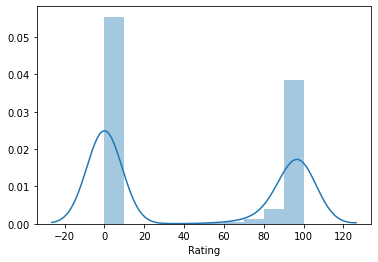

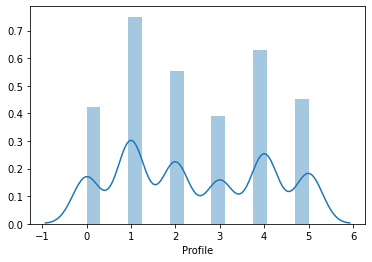

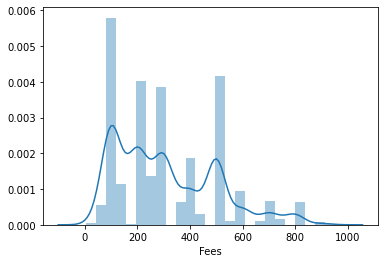

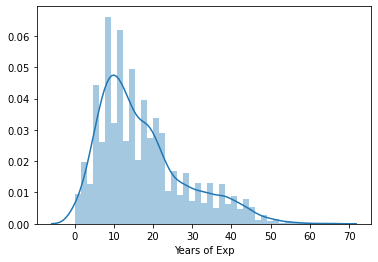

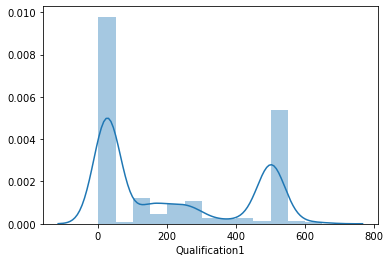

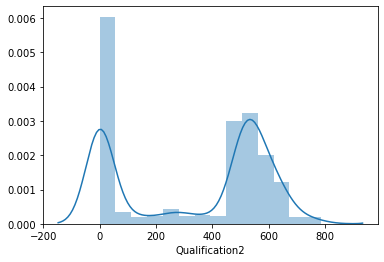

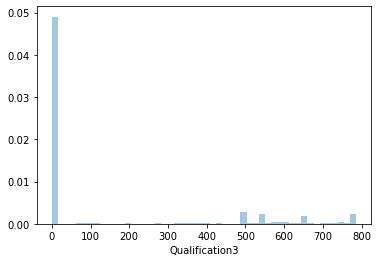

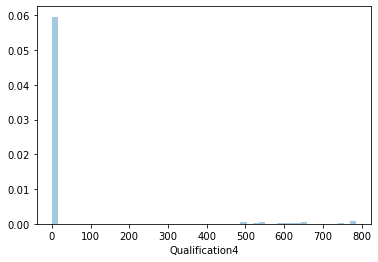

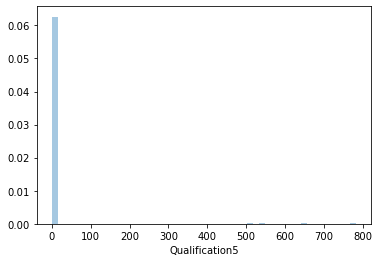

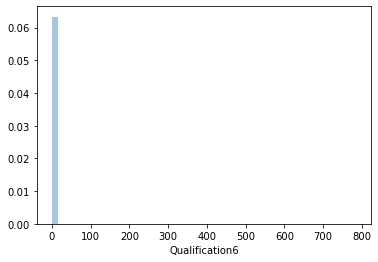

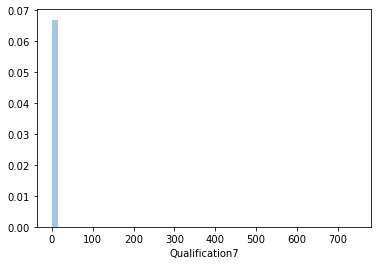

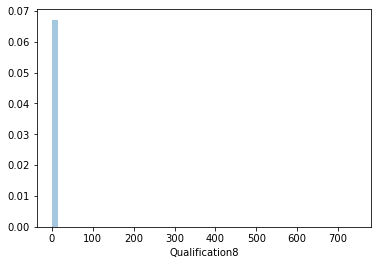

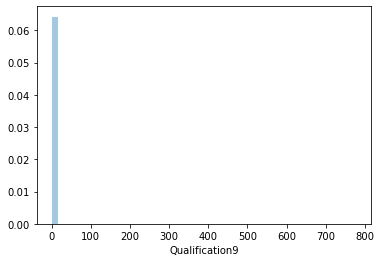

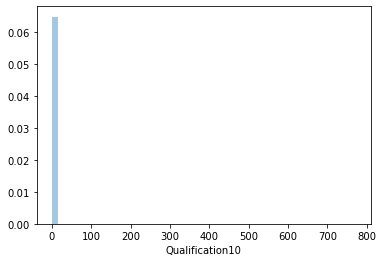

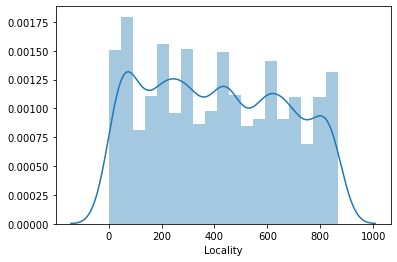

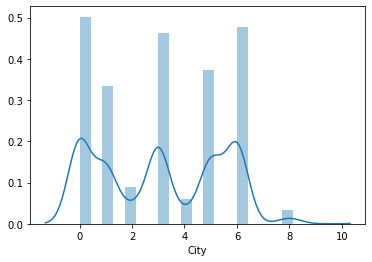

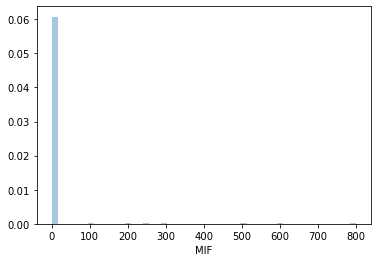

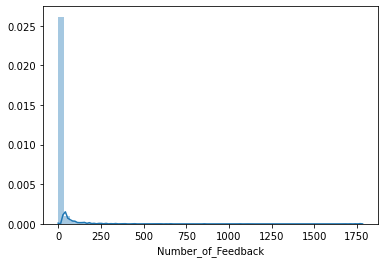

In [219]:
#analysing skewing using displot.

for i in dc.columns:
    sns.distplot(dc[i])
    plt.show()

In [220]:
# Removing skewness using power transformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')

In [221]:
for i in dc.skew().index:
    if dc.skew().loc[i]>0.55:
        dc[i]=pt.fit_transform(dc[i].values.reshape(-1,1))
    if dc.skew().loc[i]<0.55:
        dc[i]=pt.fit_transform(dc[i].values.reshape(-1,1))
    else:
        dc[i]=dc[i]

In [222]:
dc

,Rating,Profile,Fees,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF,Number_of_Feedback
0,1.132689,1.420559,-1.285167,0.740881,-0.917775,0.777169,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-0.301179,0.499898,-0.182920,1.812378
1,1.126487,-1.644145,0.435713,-0.317069,-1.041449,0.754595,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,1.520241,-1.441281,-0.182920,1.884852
2,-0.897118,0.418830,0.191110,-0.684245,1.196306,0.918499,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,0.284307,-1.441281,-0.182920,-0.575357
3,-0.897118,-1.644145,-0.084986,-0.317069,-1.041449,-0.636524,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-1.457475,-1.441281,5.477811,-0.575357
4,1.132689,-1.644145,-0.084986,0.437420,-1.041449,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-0.145835,-0.811819,-0.182920,1.529781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1.126487,0.418830,0.191110,0.355443,1.196306,0.911098,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-1.443539,-1.441281,-0.182920,1.872602
5957,-0.897118,0.940156,-1.285167,1.318915,1.196306,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,0.564569,-0.811819,-0.182920,-0.575357
5958,1.123332,0.940156,1.373733,1.750682,1.196306,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-0.650604,0.116034,-0.182920,1.768045
5959,1.100159,0.940156,-1.285167,-0.004049,1.196306,0.772972,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,1.478807,1.177424,-0.182920,-0.575357


In [223]:
dc.skew()

Rating                 0.218550
Profile               -0.139151
Fees                   0.000298
Years of Exp          -0.046923
Qualification1         0.076769
Qualification2        -0.577006
Qualification3         1.285326
Qualification4         3.619025
Qualification5         6.959321
Qualification6        13.331593
Qualification7        22.226125
Qualification8        34.493472
Qualification9        38.574597
Qualification10       77.207513
Locality              -0.263130
City                  -0.204193
MIF                    5.285439
Number_of_Feedback     1.189303
dtype: float64

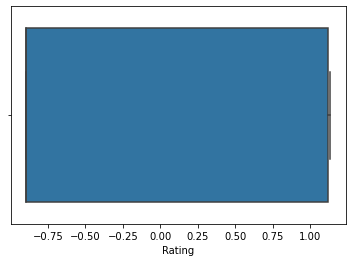

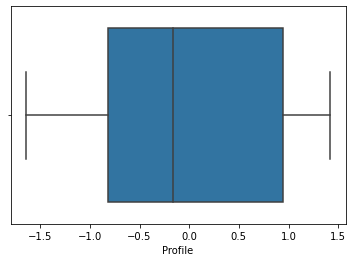

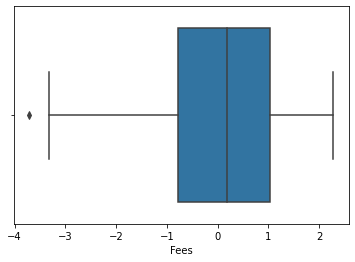

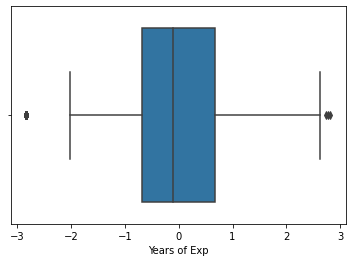

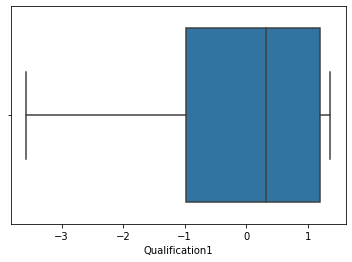

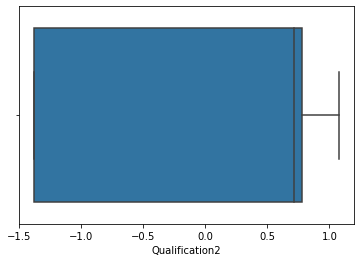

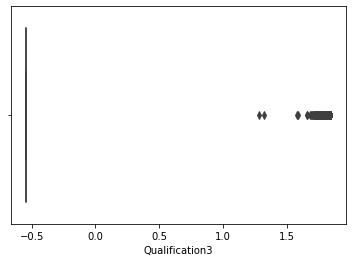

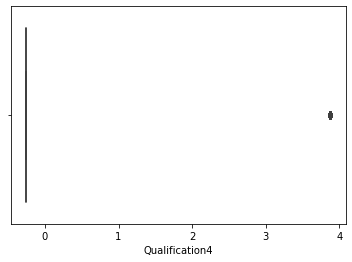

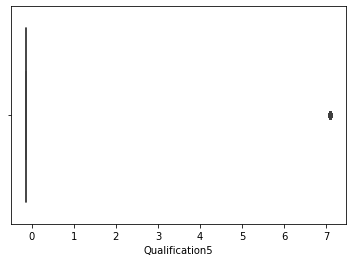

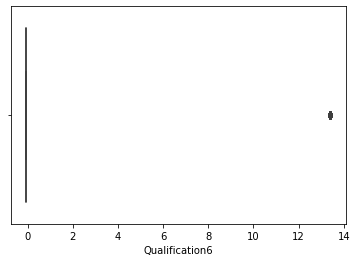

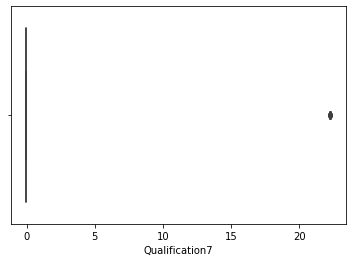

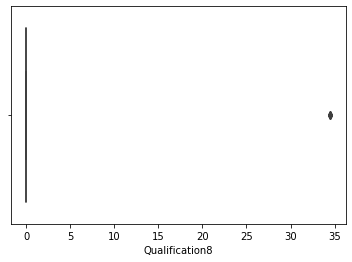

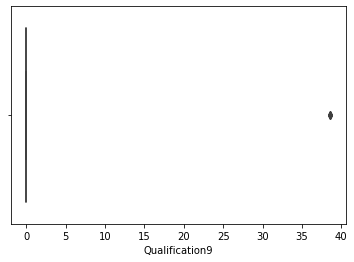

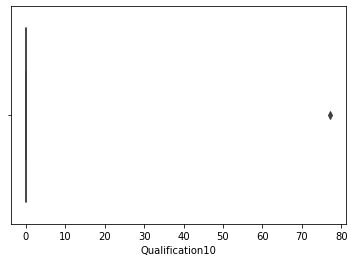

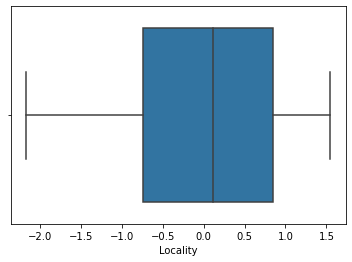

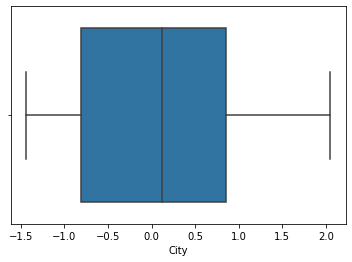

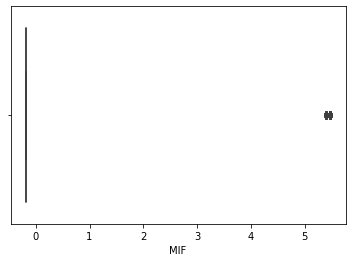

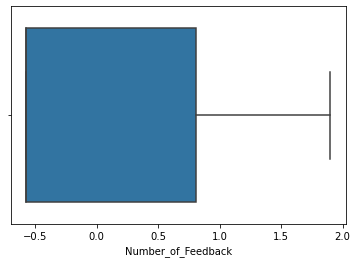

In [224]:
# checking for outliers
for i in dc.columns:
    sns.boxplot(dc[i])
    plt.show()

In [225]:
from scipy.stats import zscore
z=np.abs(zscore(dc))

In [226]:
#threshold=3
dc_new=dc[(z<3).all(axis=1)]
print('Before removing outliers shape was:',dc.shape,'\nAfter removing outliers shape is:',dc_new.shape)

Before removing outliers shape was: (5961, 18) 
After removing outliers shape is: (5398, 18)


In [227]:
dc_new

,Rating,Profile,Fees,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF,Number_of_Feedback
0,1.132689,1.420559,-1.285167,0.740881,-0.917775,0.777169,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-0.301179,0.499898,-0.18292,1.812378
1,1.126487,-1.644145,0.435713,-0.317069,-1.041449,0.754595,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,1.520241,-1.441281,-0.18292,1.884852
2,-0.897118,0.418830,0.191110,-0.684245,1.196306,0.918499,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,0.284307,-1.441281,-0.18292,-0.575357
4,1.132689,-1.644145,-0.084986,0.437420,-1.041449,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-0.145835,-0.811819,-0.18292,1.529781
5,-0.897118,-1.644145,-1.285167,-0.823148,-1.041449,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,0.785463,-0.811819,-0.18292,-0.575357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1.126487,0.418830,0.191110,0.355443,1.196306,0.911098,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-1.443539,-1.441281,-0.18292,1.872602
5957,-0.897118,0.940156,-1.285167,1.318915,1.196306,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,0.564569,-0.811819,-0.18292,-0.575357
5958,1.123332,0.940156,1.373733,1.750682,1.196306,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-0.650604,0.116034,-0.18292,1.768045
5959,1.100159,0.940156,-1.285167,-0.004049,1.196306,0.772972,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,1.478807,1.177424,-0.18292,-0.575357


In [228]:
dc_new.skew()

Rating                0.223807
Profile              -0.131856
Fees                  0.030539
Years of Exp         -0.063483
Qualification1        0.127567
Qualification2       -0.533614
Qualification3        1.662620
Qualification4        0.000000
Qualification5        0.000000
Qualification6        0.000000
Qualification7        0.000000
Qualification8        0.000000
Qualification9        0.000000
Qualification10       0.000000
Locality             -0.274548
City                 -0.195694
MIF                   0.000000
Number_of_Feedback    1.221836
dtype: float64

In [229]:
x=dc_new.drop(['Fees'],axis=1)
x

,Rating,Profile,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF,Number_of_Feedback
0,1.132689,1.420559,0.740881,-0.917775,0.777169,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-0.301179,0.499898,-0.18292,1.812378
1,1.126487,-1.644145,-0.317069,-1.041449,0.754595,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,1.520241,-1.441281,-0.18292,1.884852
2,-0.897118,0.418830,-0.684245,1.196306,0.918499,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,0.284307,-1.441281,-0.18292,-0.575357
4,1.132689,-1.644145,0.437420,-1.041449,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-0.145835,-0.811819,-0.18292,1.529781
5,-0.897118,-1.644145,-0.823148,-1.041449,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,0.785463,-0.811819,-0.18292,-0.575357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,1.126487,0.418830,0.355443,1.196306,0.911098,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-1.443539,-1.441281,-0.18292,1.872602
5957,-0.897118,0.940156,1.318915,1.196306,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,0.564569,-0.811819,-0.18292,-0.575357
5958,1.123332,0.940156,1.750682,1.196306,-1.380597,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,-0.650604,0.116034,-0.18292,1.768045
5959,1.100159,0.940156,-0.004049,1.196306,0.772972,-0.546213,-0.257991,-0.140876,-0.074611,-0.044913,-0.028974,-0.025913,-0.012953,1.478807,1.177424,-0.18292,-0.575357


In [230]:
y=dc_new['Fees']
y

0      -1.285167
1       0.435713
2       0.191110
4      -0.084986
5      -1.285167
          ...   
5956    0.191110
5957   -1.285167
5958    1.373733
5959   -1.285167
5960   -0.404278
Name: Fees, Length: 5398, dtype: float64

In [231]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()

In [232]:
xx=mns.fit_transform(x)
x=pd.DataFrame(xx,columns=x.columns)
x

,Rating,Profile,Years of Exp,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,Locality,City,MIF,Number_of_Feedback
0,1.000000,1.000000,0.632950,0.396114,0.879187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.502972,0.556078,0.0,0.964947
1,0.996944,0.000000,0.445924,0.363370,0.869989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.992614,0.000000,0.0,0.994235
2,0.000000,0.673140,0.381014,0.955844,0.936773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.660365,0.000000,0.0,0.000000
3,1.000000,0.000000,0.579304,0.363370,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544732,0.180318,0.0,0.850742
4,0.000000,0.000000,0.356458,0.363370,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.795088,0.180318,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5393,0.996944,0.673140,0.564812,0.955844,0.933757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195877,0.000000,0.0,0.989285
5394,0.000000,0.843246,0.735136,0.955844,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.735706,0.180318,0.0,0.000000
5395,0.995390,0.843246,0.811465,0.955844,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.409038,0.446115,0.0,0.947030
5396,0.983974,0.843246,0.501260,0.955844,0.877477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.981476,0.750165,0.0,0.000000


In [233]:
x.skew()

Rating                0.223807
Profile              -0.131856
Years of Exp         -0.063483
Qualification1        0.127567
Qualification2       -0.533614
Qualification3        1.662620
Qualification4        0.000000
Qualification5        0.000000
Qualification6        0.000000
Qualification7        0.000000
Qualification8        0.000000
Qualification9        0.000000
Qualification10       0.000000
Locality             -0.274548
City                 -0.195694
MIF                   0.000000
Number_of_Feedback    1.221836
dtype: float64

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
list=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor()]
for j in list:
    print('For the algorithm: ',j)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=48)
    j.fit(x_train,y_train)
    pred=j.predict(x_test)
    r2=r2_score(pred,y_test)
    print('Score is:',j.score(x_train,y_train))
    print('r2 score is: ',r2)
    print('Mean absolute error is: ',mean_absolute_error(pred,y_test))
    print('Mean squared error:',mean_squared_error(pred,y_test))
    print('Root mean squared error: ',np.sqrt(mean_squared_error(pred,y_test)))
    print("✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦")
    print('\n')

For the algorithm:  LinearRegression()
Score is: 0.13356943671192323
r2 score is:  -5.866885333536436
Mean absolute error is:  0.7688923075270656
Mean squared error: 0.858225218676603
Root mean squared error:  0.9264044573924517
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


For the algorithm:  SVR()
Score is: 0.19498139420986949
r2 score is:  -2.034519080884462
Mean absolute error is:  0.7411674337576725
Mean squared error: 0.8505494035217972
Root mean squared error:  0.9222523534921433
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


For the algorithm:  DecisionTreeRegressor()
Score is: 0.99823773744904
r2 score is:  -0.4402731202588235
Mean absolute error is:  0.923754569766904
Mean squared error: 1.554258887676113
Root mean squared error:  1.2466991969501355
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


For the algorithm:  KNeighborsRegressor()
Score is: 0.37867864961270037
r2 score is:  -1.4506451006775154
Mean absolute error is:  0.7541482932835376
Mean squared error: 0.9041948824574553
Root mean squared error:  0.9508

In [235]:
# Using lasso,ridge,ElasticNet
from sklearn.linear_model import Ridge,Lasso,ElasticNet
list=[Ridge(alpha=0.01),Lasso(alpha=0.01),ElasticNet(alpha=0.01)]
for j in list:
    print('for the algorithm: ',j)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=48)
    j.fit(x_train,y_train)
    pred=j.predict(x_test)
    r2=r2_score(pred,y_test)
    print('Score is:',j.score(x_train,y_train))
    print('r2 score is: ',r2)
    print('Mean absolute error is: ',mean_absolute_error(pred,y_test))
    print('Mean squared error:',mean_squared_error(pred,y_test))
    print('Root mean squared error: ',np.sqrt(mean_squared_error(pred,y_test)))
    print("✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦")
    print('\n')

for the algorithm:  Ridge(alpha=0.01)
Score is: 0.1335694366446919
r2 score is:  -5.867091218794755
Mean absolute error is:  0.7688925682487947
Mean squared error: 0.8582248904462798
Root mean squared error:  0.9264042802396154
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


for the algorithm:  Lasso(alpha=0.01)
Score is: 0.1255357910892213
r2 score is:  -8.540727042483514
Mean absolute error is:  0.7750804698405127
Mean squared error: 0.8612220636989041
Root mean squared error:  0.9280205082318516
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


for the algorithm:  ElasticNet(alpha=0.01)
Score is: 0.13030928838956768
r2 score is:  -7.526355616115135
Mean absolute error is:  0.772186501028025
Mean squared error: 0.8584680978262135
Root mean squared error:  0.9265355351125036
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦




In [236]:
# Using ensemble techniques to boost up our score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
list=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=48)
for m in list:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Score of :',m,"is:",score)
    print('r2 score is: ',r2)
    print('Mean absolute error is: ',mean_absolute_error(predict,y_test))
    print('Mean squared error:',mean_squared_error(predict,y_test))
    print('Root mean squared error: ',np.sqrt(mean_squared_error(predict,y_test)))
    print("✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦")
    print('\n')

Score of : RandomForestRegressor() is: 0.886359746810263
r2 score is:  -7.526355616115135
Mean absolute error is:  0.7089705270294863
Mean squared error: 0.795562990305796
Root mean squared error:  0.8919433784191663
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


Score of : AdaBoostRegressor() is: 0.14670860577334233
r2 score is:  -7.526355616115135
Mean absolute error is:  0.7751458586693745
Mean squared error: 0.8544421406784628
Root mean squared error:  0.9243603954510723
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦


Score of : GradientBoostingRegressor() is: 0.30192814509686683
r2 score is:  -7.526355616115135
Mean absolute error is:  0.7160140395825156
Mean squared error: 0.77279976146191
Root mean squared error:  0.8790903033601895
✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦✦




In [237]:
# Best parameters for Decision Tree Regressor
from sklearn.model_selection import GridSearchCV
params={'criterion':['mse','mae','poisson','friedman_mse']}
dtr=DecisionTreeRegressor()
cv=GridSearchCV(dtr,params)
cv.fit(x,y)
cv.best_params_

{'criterion': 'mse'}

In [238]:
#working on the model with best parameter
dtr=DecisionTreeRegressor(criterion='friedman_mse')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=48)
dtr.fit(x_train,y_train)
score=dtr.score(x_train,y_train)
pred=dtr.predict(x_test)
print('Score of dtr is:',score)
print('r2 score is: ',r2_score(pred,y_test))
print('Mean absolute error is: ',mean_absolute_error(pred,y_test))
print('Mean squared error:',mean_squared_error(pred,y_test))
print('Root mean squared error: ',np.sqrt(mean_squared_error(pred,y_test)))

Score of dtr is: 0.99823773744904
r2 score is:  -0.450767695851815
Mean absolute error is:  0.930240645004901
Mean squared error: 1.5663579684123599
Root mean squared error:  1.2515422359682313


In [239]:
#Applying cross validation to the best model to see if it is under fitting or over fitting
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(dtr,x,y,cv=8)
print('The cross validation score is: ',cvs)
print('The mean and standard deviations are: ',cvs.mean(),cvs.std())

The cross validation score is:  [-0.49542563 -0.38251757 -0.62429576 -0.61859584 -0.48597578 -0.51511528
 -0.50433214 -0.39292002]
The mean and standard deviations are:  -0.502397253223782 0.08306738239835479


In [240]:
#Saving the best model
import joblib
joblib.dump(dtr,'doctor.pkl')

['doctor.pkl']

# TEST DATA

In [241]:
dct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [242]:
dct.shape

(1987, 6)

In [243]:
dct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [244]:
dct.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [245]:
dd=dct.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualifications of a doctor in the train dataset is {}\n".format(dd.max()))
print("And the qualifications of is --> {}\n\n".format(dct.Qualification[dd.idxmax()]))
print("Minimum qualifications of a doctor in the train dataset is {}\n".format(dd.min()))

print("And the qualifications of is --> {}\n\n".format(dct.Qualification[dd.idxmin()]))

Maximum qualifications of a doctor in the train dataset is 17

And the qualifications of is --> BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontology, Certified Advanced Course in Wisdom Tooth Extraction, Certificate in Cosmetic Dentistry, Fellowship in Aesthetic Dentistry (FAD), Post Graduate Certificate in Endodontics (PGCE)


Minimum qualifications of a doctor in the train dataset is 1

And the qualifications of is --> MBBS




In [246]:
#The qualification column is very inconsistent lets reform the entries of the column and remove the inconsitencies using the function defined earlier named 'sort'.
#def sortQual(text):
#    ag = re.sub(r'\([^()]+\)', lambda x: x.group().replace(",","-"),text)
#    return ','.join(sorted(ag.lower().replace(" ","").split(",")))


In [247]:
dct['Qualification']=dct['Qualification'].apply(lambda x:sortQual(x))
dct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,mbbs,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"ddvl,mbbs",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,bams,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"bds,mds-conservativedentistry&endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"mbbs,md-dermatology,venereology&leprosy",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"mbbs,md/ms-obstetrics&gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,bds,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [248]:
#Separating the qualifications and listing them with the function defined earlier namely 'unique'


#def doc(series):
#   Quals =''
#    for i in series:
#        Quals+= i + ','
#    return Quals

In [249]:
from collections import Counter

text= doc(dct.Qualification)
dff = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()),orient='index').reset_index()
dff.columns=["Qualification",'Count']
dff.head(10)

,Qualification,Count
0,mbbs,980
1,bds,428
2,bhms,249
3,bams,243
4,md-dermatology,196
5,ms-ent,128
6,md-generalmedicine,99
7,venereology&leprosy,91
8,diplomainotorhinolaryngology(dlo),85
9,ddvl,67


In [250]:
dff.isnull().sum()

Qualification    0
Count            0
dtype: int64

In [251]:
#Encoding above dff-Qualification
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dff['Code']=le.fit_transform(dff['Qualification'].astype('category'))
dff.head(10)

,Qualification,Count,Code
0,mbbs,980,268
1,bds,428,14
2,bhms,249,16
3,bams,243,12
4,md-dermatology,196,286
5,ms-ent,128,354
6,md-generalmedicine,99,290
7,venereology&leprosy,91,425
8,diplomainotorhinolaryngology(dlo),85,112
9,ddvl,67,68


In [252]:
#Dictionary to save the Qualification and respective code only so we can use these codes further to encode the degrees to avoid a degree bearing more than one encoding.
dict_test=dict(zip(dff['Qualification'],dff['Code']))
dict_test

{'mbbs': 268,
 'bds': 14,
 'bhms': 16,
 'bams': 12,
 'md-dermatology': 286,
 'ms-ent': 354,
 'md-generalmedicine': 290,
 'venereology&leprosy': 425,
 'diplomainotorhinolaryngology(dlo)': 112,
 'ddvl': 68,
 'md-homeopathy': 291,
 'ms-otorhinolaryngology': 359,
 'md-ayurvedamedicine': 280,
 'dnb-ent': 138,
 'ddv': 67,
 'mds-conservativedentistry&endodontics': 315,
 'md-medicine': 294,
 'mds-oral&maxillofacialsurgery': 318,
 'dnb-generalmedicine': 140,
 'dnb-dermatology&venereology': 137,
 'postgraduatediplomaindiabetology(pgdd)': 408,
 'md-internalmedicine': 293,
 'mds-orthodontics': 324,
 'mds': 313,
 'mds-prosthodontistandcrownbridge': 333,
 'dnb': 134,
 'diplomaindermatology': 88,
 'mds-periodontologyandoralimplantology': 330,
 'mds-paedodonticsandpreventivedentistry': 326,
 'mds-prosthodontics': 331,
 'dnb-otorhinolaryngology': 146,
 'ms-generalsurgery': 355,
 'dhms(diplomainhomeopathicmedicineandsurgery)': 73,
 'mds-orthodonticsanddentofacialorthopaedics': 325,
 'fellowofacademyofge

In [253]:
#splitting different qualifications into different columns:
for i in range(0,dd.max()):
    dct["Qualification"+str(i+1)]=dct['Qualification'].str.split(',').str[i]

In [254]:
dct.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification8,Qualification9,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17
0,mbbs,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ddvl,mbbs",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bams,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bds,mds-conservativedentistry&endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"bds,mds",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...,bds,mds,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"diplomainotorhinolaryngology(dlo),mbbs",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore",diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"bds,mds-pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...,bds,mds-pedodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"bams,m.d.inkayachikista,md-ayurvedamedicine,yo...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore",bams,m.d.inkayachikista,md-ayurvedamedicine,yogateacherstrainingcourse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bhms,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN,bhms,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
#converting experience to numeric
dct['Experience']=dct['Experience'].str.rstrip('years experience').astype('int')

In [256]:
dct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification8,Qualification9,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17
0,mbbs,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ddvl,mbbs",40,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bams,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bds,mds-conservativedentistry&endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,bams,doctorofmedicine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,"mbbs,md-dermatology,venereology&leprosy",4,NaN,"Choolai, Chennai",Dermatologists,NaN,mbbs,md-dermatology,venereology&leprosy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,"mbbs,md/ms-obstetrics&gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,mbbs,md/ms-obstetrics&gynaecology,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,bds,12,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bds,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
#Converting rating to float type
dct['Rating']=dct['Rating'].str.rstrip('%').astype('float')/100
dct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification8,Qualification9,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17
0,mbbs,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bams,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,bams,doctorofmedicine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,"mbbs,md-dermatology,venereology&leprosy",4,NaN,"Choolai, Chennai",Dermatologists,NaN,mbbs,md-dermatology,venereology&leprosy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,"mbbs,md/ms-obstetrics&gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,mbbs,md/ms-obstetrics&gynaecology,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,bds,12,0.98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bds,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
#Filling null values of Rating anf Places column
dct['Rating']=dct['Rating'].fillna(0)

In [259]:
dct['Place'].mode()

0    Andheri West, Mumbai
1     Mulund West, Mumbai
dtype: object

In [260]:
#Replacing Place null values with Andheri West
dct['Place']=dct['Place'].fillna('Mulund West, Mumbai')
dct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification8,Qualification9,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bams,0,0.00,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",Ayurveda,NaN,bams,doctorofmedicine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",Dermatologists,NaN,mbbs,md-dermatology,venereology&leprosy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",General Medicine,NaN,mbbs,md/ms-obstetrics&gynaecology,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,bds,12,0.98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bds,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
dct.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info     834
Qualification1           0
Qualification2         609
Qualification3        1498
Qualification4        1867
Qualification5        1952
Qualification6        1980
Qualification7        1984
Qualification8        1985
Qualification9        1985
Qualification10       1986
Qualification11       1986
Qualification12       1986
Qualification13       1986
Qualification14       1986
Qualification15       1986
Qualification16       1986
Qualification17       1986
dtype: int64

In [262]:
#try to modify this column to make it an informative one. As we can see the presence of rupee sign ₹ in the data the program cannot understand these signs lets convert it to INR.
dct['Miscellaneous_Info']=dct['Miscellaneous_Info'].str.replace('₹','INR ')

In [263]:
#Using the function fee_info forming a column of fee separately

dct['MIF']=dct['Miscellaneous_Info'].apply(lambda x: fee_info(x) if "INR" in str(x) else 0)

In [264]:
dct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification9,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,MIF
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,bams,0,0.00,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",Ayurveda,NaN,bams,doctorofmedicine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",Dermatologists,NaN,mbbs,md-dermatology,venereology&leprosy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",General Medicine,NaN,mbbs,md/ms-obstetrics&gynaecology,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1985,bds,12,0.98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bds,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [265]:

#using the function feed(num) making a column of feedback
dct['Number_of_Feedback']=dct['Miscellaneous_Info'].apply(lambda x: feed(x) if "%" in str(x) else 0)

In [266]:
dct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,MIF,Number_of_Feedback
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",General Medicine,NaN,mbbs,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",ENT Specialist,NaN,diplomainotorhinolaryngology(dlo),mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",ddvl,mbbs,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
3,bams,0,0.00,"New Ashok Nagar, Delhi",Ayurveda,NaN,bams,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,bds,mds-conservativedentistry&endodontics,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",Ayurveda,NaN,bams,doctorofmedicine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",Dermatologists,NaN,mbbs,md-dermatology,venereology&leprosy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",General Medicine,NaN,mbbs,md/ms-obstetrics&gynaecology,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1985,bds,12,0.98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,bds,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [267]:
#Encoding all the qualification columns from 1 to 17 using the dictionary we created above namely dict_test.
grp=['Qualification1','Qualification2','Qualification3','Qualification4','Qualification5','Qualification6','Qualification7','Qualification8','Qualification9','Qualification10','Qualification11','Qualification12','Qualification13','Qualification14','Qualification15','Qualification16','Qualification17']
for i in grp:
    dct.replace({i:dict_test},inplace=True)


In [268]:
dct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification10,Qualification11,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,MIF,Number_of_Feedback
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",General Medicine,NaN,268,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",ENT Specialist,NaN,112,268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",68,268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
3,bams,0,0.00,"New Ashok Nagar, Delhi",Ayurveda,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,14,315.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",Ayurveda,NaN,12,155.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",Dermatologists,NaN,268,286.0,425.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",General Medicine,NaN,268,312.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1985,bds,12,0.98,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [269]:
#Splitting the column place into two separate columns bearing locality name and city name separately.
dct['Locality']=dct['Place'].str.split(',').str[0]
dct['City']=dct['Place'].str.split(',').str[1]

In [270]:
# Encoding categorical columns:
bin=['Profile','City','Locality']
for i in bin:
    dct[i]=le.fit_transform(dct[i].astype('str'))

In [271]:
dct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,MIF,Number_of_Feedback,Locality,City
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",4,NaN,268,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,142,6
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",3,NaN,112,268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,577,5
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",2,"70% 4 Feedback KK Nagar, Chennai",68,268.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,4,212,1
3,bams,0,0.00,"New Ashok Nagar, Delhi",0,NaN,12,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,373,3
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",1,General Dentistry Conservative Dentistry Cosme...,14,315.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",0,NaN,12,155.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,58,0
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",2,NaN,268,286.0,425.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,96,1
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",4,NaN,268,312.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,423,1
1985,bds,12,0.98,"Arekere, Bangalore",1,RCT - Root Canal Treatment Root Canal Treatmen...,14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,26,0


In [272]:
dct.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info     834
Qualification1           0
Qualification2         609
Qualification3        1498
Qualification4        1867
Qualification5        1952
Qualification6        1980
Qualification7        1984
Qualification8        1985
Qualification9        1985
Qualification10       1986
Qualification11       1986
Qualification12       1986
Qualification13       1986
Qualification14       1986
Qualification15       1986
Qualification16       1986
Qualification17       1986
MIF                      0
Number_of_Feedback       0
Locality                 0
City                     0
dtype: int64

In [273]:
#We will treat the null values in the qualification columns only. Miscellaneous_Info column would be dropped as we have extracted whatever numerical information it had.
grp=['Qualification1','Qualification2','Qualification3','Qualification4','Qualification5','Qualification6','Qualification7','Qualification8','Qualification9','Qualification10','Qualification11','Qualification12','Qualification13','Qualification14','Qualification15','Qualification16','Qualification17']
for i in grp:
    dct[i].fillna(-1,inplace=True)

In [274]:
dct

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Qualification1,Qualification2,Qualification3,Qualification4,...,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,MIF,Number_of_Feedback,Locality,City
0,mbbs,35,0.00,"Ghatkopar East, Mumbai",4,NaN,268,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,142,6
1,"diplomainotorhinolaryngology(dlo),mbbs",31,0.00,"West Marredpally, Hyderabad",3,NaN,112,268.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,577,5
2,"ddvl,mbbs",40,0.70,"KK Nagar, Chennai",2,"70% 4 Feedback KK Nagar, Chennai",68,268.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,4,212,1
3,bams,0,0.00,"New Ashok Nagar, Delhi",0,NaN,12,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,373,3
4,"bds,mds-conservativedentistry&endodontics",16,1.00,"Kanakpura Road, Bangalore",1,General Dentistry Conservative Dentistry Cosme...,14,315.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,"bams,doctorofmedicine",10,0.00,"Basavanagudi, Bangalore",0,NaN,12,155.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,58,0
1983,"mbbs,md-dermatology,venereology&leprosy",4,0.00,"Choolai, Chennai",2,NaN,268,286.0,425.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,96,1
1984,"mbbs,md/ms-obstetrics&gynaecology",9,0.00,"Porur, Chennai",4,NaN,268,312.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,423,1
1985,bds,12,0.98,"Arekere, Bangalore",1,RCT - Root Canal Treatment Root Canal Treatmen...,14,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,26,0


In [275]:
dct.drop(['Qualification','Place','Miscellaneous_Info'],axis=1,inplace=True)
dct

,Experience,Rating,Profile,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,...,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,MIF,Number_of_Feedback,Locality,City
0,35,0.00,4,268,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,142,6
1,31,0.00,3,112,268.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,577,5
2,40,0.70,2,68,268.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,4,212,1
3,0,0.00,0,12,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,373,3
4,16,1.00,1,14,315.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,0.00,0,12,155.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,58,0
1983,4,0.00,2,268,286.0,425.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,96,1
1984,9,0.00,4,268,312.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,423,1
1985,12,0.98,1,14,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,26,0


In [276]:
#checking the skewness
dct.skew()

Experience             0.963447
Rating                 0.225321
Profile                0.028926
Qualification1         0.561370
Qualification2        -0.343433
Qualification3         1.418677
Qualification4         4.045157
Qualification5         7.750776
Qualification6        18.980211
Qualification7        33.216466
Qualification8        41.438463
Qualification9        38.120370
Qualification10       44.575778
Qualification11       44.575778
Qualification12       44.575778
Qualification13       44.575778
Qualification14       44.575778
Qualification15       44.575778
Qualification16       44.575778
Qualification17       44.575778
MIF                    7.144407
Number_of_Feedback    19.444508
Locality               0.035903
City                  -0.009157
dtype: float64

In [277]:
#Removing skewness using PowerTransformer
for i in dct.skew().index:
    if dct.skew().loc[i]>0.55:
        dct[i]=pt.fit_transform(dct[i].values.reshape(-1,1))
    if dct.skew().loc[i]<0.55:
        dct[i]=pt.fit_transform(dct[i].values.reshape(-1,1))
    else:
        dct[i]=dct[i]

In [278]:
dct.skew()

Experience            -0.045200
Rating                 0.206413
Profile               -0.162395
Qualification1         0.034560
Qualification2        -0.639745
Qualification3         1.180801
Qualification4         3.693671
Qualification5         7.339665
Qualification6        16.771562
Qualification7        25.696919
Qualification8        31.496008
Qualification9        31.496008
Qualification10       44.575778
Qualification11       44.575778
Qualification12       44.575778
Qualification13       44.575778
Qualification14       44.575778
Qualification15       44.575778
Qualification16       44.575778
Qualification17       44.575778
MIF                    4.783930
Number_of_Feedback     1.057668
Locality              -0.286577
City                  -0.221379
dtype: float64

In [279]:
from scipy.stats import zscore
z=np.abs(zscore(dct))

In [280]:
#threshold=3
dct_new=dct[(z<3).all(axis=1)]

In [281]:
dct_new.skew()

Experience           -0.038523
Rating                0.211082
Profile              -0.130967
Qualification1        0.101270
Qualification2       -0.584662
Qualification3        1.526381
Qualification4        0.000000
Qualification5        0.000000
Qualification6        0.000000
Qualification7        0.000000
Qualification8        0.000000
Qualification9        0.000000
Qualification10       0.000000
Qualification11       0.000000
Qualification12       0.000000
Qualification13       0.000000
Qualification14       0.000000
Qualification15       0.000000
Qualification16       0.000000
Qualification17       0.000000
MIF                   0.000000
Number_of_Feedback    1.116275
Locality             -0.274453
City                 -0.246781
dtype: float64

In [282]:
#Scaling using MinMaxScaler
x6=mns.fit_transform(dct_new)
final_test=pd.DataFrame(x6,columns=dct_new.columns)
final_test

,Experience,Rating,Profile,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,...,Qualification12,Qualification13,Qualification14,Qualification15,Qualification16,Qualification17,MIF,Number_of_Feedback,Locality,City
0,0.788086,0.000000,0.834949,0.959410,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.374570,0.891747
1,0.744233,0.000000,0.658728,0.825136,0.829785,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.987124,0.777148
2,0.838586,0.820039,0.467404,0.743085,0.829785,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.806378,0.494955,0.207230
3,0.000000,0.000000,0.000000,0.426703,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.731327,0.521971
4,0.536131,1.000000,0.253674,0.456204,0.886022,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.525287,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0.569651,0.989647,0.253674,0.456204,0.899542,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996695,0.957564,0.207230
1789,0.416063,0.000000,0.000000,0.426703,0.663328,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.199424,0.000000
1790,0.239176,0.000000,0.467404,0.959410,0.851988,0.999944,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.284773,0.207230
1791,0.392035,0.000000,0.834949,0.959410,0.882593,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.797484,0.207230


In [283]:
dct_new['Qualification3'].value_counts()

-0.571259    1440
 1.745650      66
 1.773779      65
 1.763212      37
 1.749919      29
             ... 
 1.761663       1
 1.773515       1
 1.768306       1
 1.764214       1
 1.766152       1
Name: Qualification3, Length: 79, dtype: int64

In [284]:
#Dropping certain columns as to improve score : 
final_test=final_test.drop(['Qualification11','Qualification12','Qualification13','Qualification14','Qualification15','Qualification16','Qualification17'],axis=1)

In [285]:
final_test

,Experience,Rating,Profile,Qualification1,Qualification2,Qualification3,Qualification4,Qualification5,Qualification6,Qualification7,Qualification8,Qualification9,Qualification10,MIF,Number_of_Feedback,Locality,City
0,0.788086,0.000000,0.834949,0.959410,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.374570,0.891747
1,0.744233,0.000000,0.658728,0.825136,0.829785,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.987124,0.777148
2,0.838586,0.820039,0.467404,0.743085,0.829785,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.806378,0.494955,0.207230
3,0.000000,0.000000,0.000000,0.426703,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.731327,0.521971
4,0.536131,1.000000,0.253674,0.456204,0.886022,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.525287,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1788,0.569651,0.989647,0.253674,0.456204,0.899542,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.996695,0.957564,0.207230
1789,0.416063,0.000000,0.000000,0.426703,0.663328,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.199424,0.000000
1790,0.239176,0.000000,0.467404,0.959410,0.851988,0.999944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.284773,0.207230
1791,0.392035,0.000000,0.834949,0.959410,0.882593,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.797484,0.207230


In [286]:
load=joblib.load('doctor.pkl')
load.predict(final_test)

array([ 1.04170346,  0.65596367, -1.28516741, ...,  0.43571316,
        1.04170346,  0.85678255])